In [ ]:
#this is a cell for all imports used in this lab

import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd  
import seaborn as sns 
from sklearn.datasets import load_boston
import PIL
import cv2

#Advanced Numpy Operations

Aaaaand \*ba dum tss\* here is the original image of a parrot:
<br>
![](https://drive.google.com/uc?export=view&id=1SbpTCtyfVURCJseCKhPnUEFcRg4P9JsX)



In [ ]:
#download the parrot
!wget -O parrot.jpg "https://drive.google.com/uc?export=view&id=1SbpTCtyfVURCJseCKhPnUEFcRg4P9JsX"

In [ ]:
#OpenCV for Python
parrot = cv2.imread("parrot.jpg")


print(type(parrot))

#height x width x channel
print(parrot.shape)


Now that we have the image with the parrot we can play with different image filters and see how are they implemented using Numpy. Take into account that the following implementations do not provide an efficient way to solve Numpy operations. Each filter represents a convolution and the general formulas is:
$$processed\_img(x,y)=\omega*original\_image$$
where $\omega$ represents the filter kernel. The object of this operations is to apply some modification to each pixel.
<br>
##Box Blur
*  is a spatial domain linear filter in which each pixel in the resulting image has a value equal to the average value of its neighboring pixels in the input image.  A 3 by 3 box blur can be written as following:
<br>
<br>
$\frac{1}{9}*
\begin{bmatrix}
    1 & 1 & 1 \\
    1 & 1 & 1 \\
    1 & 1 & 1 \\
\end{bmatrix}$
*  if we want to apply this filter for each pixel, we will need to pad the matrix with zeros on each side like in the following image:
![](https://drive.google.com/uc?export=view&id=1VhirfwL0UzD7UPVtst3KNroNlos7nsnC)

(340, 453, 3)
(3, 3)
(342, 455, 3)


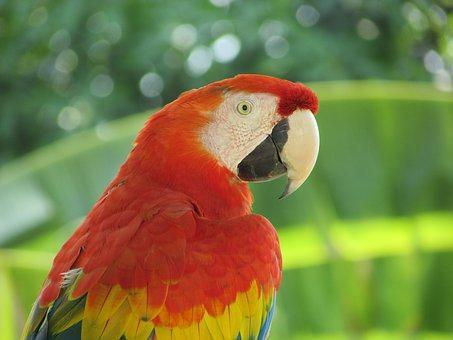

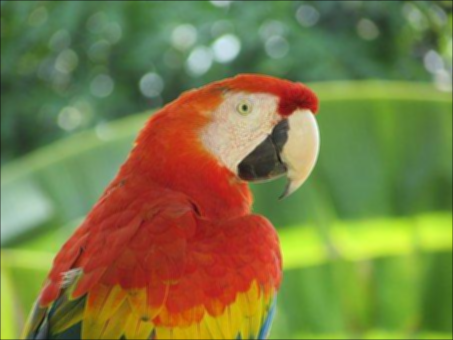

In [ ]:
#height x width x channel
#there are three channels: R, G and B
print(parrot.shape)

#generating box blur filter
kernel = np.ones(shape=(3,3))/9
print(kernel.shape)

#padding image
parrot_pad = np.pad(parrot, 
                    pad_width=((1,1), (1,1), (0,0)), 
                    mode='constant', 
                    constant_values=0)
print(parrot_pad.shape)
#finally the size of the blurred image will be the same
#with the original one
parrot_blur = np.zeros_like(parrot)

(height, width, channels) = parrot_pad.shape

for c in range(0,channels):
  for h in range(1,height-1):
    for w in range(1,width-1):
      parrot_blur[h-1][w-1][c] = np.sum(kernel*parrot_pad[h-1:h+2,w-1:w+2,c])

#read here about cv2_imshow -> https://colab.research.google.com/notebooks/snippets/advanced_outputs.ipynb
#do not use matplotlib for pics, is ruining all the color map, a nightmare
from google.colab.patches import cv2_imshow
cv2_imshow(parrot)
cv2_imshow(parrot_blur)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Statistical Formulas

Given a set of values $X=\{x_1, x_2, \dotso, x_N\}$ we define the following mathematical properties:

## Measuring Central Tendancy

<br>

*   **Population Mean** - this measure is used to define a central tendancy in data
$$\mu = \mu_X= \frac{x_1+x_2+\dotso+x_N}{N}=\frac{1}{N}\sum\limits_{i=1}^{N}x_i$$

<br>

*  **Weighted Mean** - given a set $W = {w_1, w_2, \dotso, w_n}$ we have the following formulas:

$$\mu=\frac{w_1*x_1+w_2*x_2+\dotso+w_n*x_n}{w_1+w_2+\dotso+w_n}$$

<br>

*   **Sample Mean** - this measure is used to define a central tendancy in data
$$\bar{x} = \bar{x}_X= \frac{x_1+x_2+\dotso+x_N}{n-1}=\frac{1}{n-1}\sum\limits_{i=1}^{n}x_i$$

*   **Median** - this measure is used to define a central tendancy in data. Suppose we have an ordered set X, then we have:

$$m = median(X) = \frac{x_{floor(\frac{N+1}{2})}+x_{ceil(\frac{N+1}{2})}}{2}$$

<br>

*  **Mode** - the most frequent value

$$Mode(X)=\{x_i | \forall x_j, i \neq j, count(x_i) \geqslant	 count(x_j) \}$$

<br>

*  **Midrange** - is the arithmetic
mean of the largest and the smallest value from a set of values

$$M=M_x=\frac{max(x)+min(x)}{2}, where\ x \in X$$


<br>

## Measuring Dispersion

*   **Population Standard Deviation** -  is a measure that is used to quantify the
amount of variation or dispersion of a set of data values.
$$\sigma = \sigma_X = \sqrt{\frac{|x_1-\mu|^2+|x_2-\mu|^2+\dotso+|x_N-\mu|^2 }{N}}=\sqrt{\frac{\sum\limits_{i=1}^{N}(x_i-\mu)^2}{N}}$$

<br>

*   **Sample Standard Deviation**
$$s = s_X = \sqrt{\frac{|x_1-\bar{x}|^2+|x_2-\bar{x}|^2+\dotso+|x_n-\bar{x}|^2 }{n-1}}=\sqrt{\frac{\sum\limits_{i=1}^{n-1}(x_i-\bar{x})^2}{n-1}}$$

<br>

*   **Population Variance**:
$$Var(X) = \sigma_X^2$$

<br>

*   **Sample Variance**:
$$Var(X) = s^2$$


<br>

*   **IQR** - is a method of identifying outliers
    
    Suppose X is an ordered set then we have the following values:
    *  $min - min(X)$
    *  $max - max(X)$
    *  $m - median(X)$
    
    Then we compute the following quartiles:
    *  $Q_2 = m$
    *  $Q_1 = median([min,m])$
    *  $Q_3 = median([m,max])$
    
    Finally, we can compute IQR:
    $$IQR = Q_3 - Q_1$$
    
    Potential outliers are values which respect the following relations:
    $$O=\{\forall x \in X|x\leqslant {Q_1-1.5*IQR} \lor x \geqslant Q_3+1.5*IQR\}$$
    
    

<br>

To clarify this formulas, let's suppose we have a population of five dogs like the one portrayed in the picture below. 
![](https://drive.google.com/uc?export=view&id=1oY0CTHt3rXH6LDhGuTpq_3Ye6rhjcnf2)
Each red arrow represent the height of a dog in milimetres. The green line represents the average height($\mu$). The distance from the green line and the blue line represents the normal range for a dog's height($\sigma$). What's above first blue line and below second blue line we can call it extra large or extra small. 
<br>
The difference between population and samples formulas is that sample is taken from a population and  Bessel's correction principle states that by adding a degree of freedom (the -1 from n-1) we can correct the bias in the estimation of the population variance. If we have a list of heights [1,2,3,10,11,12] with population mean equal with $\frac{1+2+3+10+11+12}{6}=6.5$ and we sample three of them, let's say [1,2,3] the biased mean would be $\frac{1+2+3}{3}=2$ and the unbiased mean would be $\frac{1+2+3}{3-1}=3$ which is closer to the real mean of the population.

<br>
For a complete overview of the study case follow this [link](https://www.mathsisfun.com/data/standard-deviation)

Now, let's suppose we have a population of Snoops with different heights.
![](https://drive.google.com/uc?export=view&id=1XB9dXRw3jYUFDoyPBYi1-rOQWc4oaXkv)

Thus we compute the following values


$\mu=\frac{7+1+(-6)+(-2)}{4} = 0$

$\sigma=\sqrt{\frac{(7-0)^2+(1-0)^2+(-6-0)^2+(-2-0)^2}{4}}=4.74$

$var = \sigma^2 = 22.5$


$var$ vs $\sigma$:
<br>
-> both capture the spread-out of the data values
<br>
-> the advantage of using $\sigma$ is that it is measured in the same units as $\mu$
<br>
-> generally, the more widely spread the values are, the larger the standard deviation is

<br>

## Data Transformation

*   **Min-Max Normalization** - this normalization maps all the numbers from a set to [0,1] interval
$$x_{new}=\frac{x_{old}-x_{min}}{x_{max} - x_{min}}$$

*   **Min-Max Normalization (positive numbers)**
$$x_{new}=\frac{x_{old}}{x_{max}}$$

*   **Z-Score** - this transformation is used in order to measure how many standard deviations the value is from its mean
$$x_{new}=\frac{x-\mu}{\sigma}$$

*   **L1-norm** - useful when having a vector of probabilities or fractions of some mixture in order to make sure they all add up to one.
$$x_{new}=\frac{x_{old}}{\sum\limits_{i=1}^{N}|x_i|}$$

*   **L2-norm** - useful when the vector has some kind of coordinates or features
$$x_{new}=\frac{x_{old}}{\sum\limits_{i=1}^{N}x_i^2}$$






#Exercises

##E1. Simple Statistics 
Implement the methods from the class **Stats** and test with the following list.

$v = [-20,1,3,4,6,7,7,8,8,8,10,12,17]$

In [ ]:
import math
import numpy as np
import statistics as s



def getlist(l, x, y):
  return [elem for elem in l if elem >= x and elem <= y]

#pretty print
def go(text, value):
  output = text + ": "
  if value is None:
   output += "not implemented"
  else:
   output += str(value)
  print(output)

class Stats():
  #receives a list
  #sorts the list
  #keeps the length
  def __init__(self, population):
    self.population = sorted(population)
    self.N = len(population)

  #TODO: returns float
  def median(self, l=[]):
    if len(l) == 0:
      l = self.population
    sort = sorted(l)
    length = len(l)
    median_index = (length - 1) // 2
    print(median_index)
    if(length % 2 != 0):
      return sort[median_index]
    else:
      return (sort[median_index] + sort[median_index + 1]) / 2.0

  #DONE: returns float
  def mean(self):
    return sum(self.population)/self.N

  #TODO: returns float
  def weighted_mean(self, w):
    return sum(np.multiply(self.population, w)) / sum(w)

  #TODO: returns float
  def std(self):
    wm = self.weighted_mean(w)
    return math.sqrt(sum([((x - wm) ** 2) for x in self.population]) / len(self.population))

  #TODO: returns float
  def var(self):
    return (self.std() ** 2)

  #TODO: returns a value from list
  def mode(self):
    c = []
    counter = 1

    for i in range(1, self.N):
      if self.population[i] == self.population[i - 1]:
        counter = counter + 1
      else:
        c.append(counter)
        counter = 1
    return max(c)

  #TODO: returns list with outliers
  def iqr_outliers(self):
    Q2 = s.median(self.population)
    l2 = getlist(self.population, Q2, max(self.population))
    l1 = getlist(self.population, min(self.population), Q2)
    Q1 = s.median(l1)
    Q3 = s.median(l2)
    IQR = Q3 - Q1
    res = []
    for x in self.population:
      if (x <= Q1 - 1.5 * IQR) or (x >= Q3 + 1.5 * IQR):
        res.append(x)
    return res
  #TODO: returns a list with normalized values
  def z_score(self):
    wm = self.weighted_mean(w)
    std = self.std()
    return [((x - wm) / std) for x in self.population]
  
  #TODO: returns a list with normalized values
  def min_max(self):
    l = self.population
    return [(x - min(l)) / (max(l) - min(l)) for x in l]

  #TODO: returns a list with normalized values
  def l1_norm(self):
    s = sum([abs(x) for x in self.population])
    return [x / s for x in self.population]
  
  #TODO: returns a list with normalized values
  def l2_norm(self):
    s = sum([x ** 2 for x in self.population])
    return [x / s for x in self.population]
  
v = [-20,1,3,4,6,7,7,8,8,8,10,12,17]
w = [1 if i<4 else 0 for i in range(len(v))]
s = Stats(v)

go("median", s.median())
go("mean", s.mean())
go("weighted_mean", s.weighted_mean(w))
go("std", s.std())
go("var", s.var())
go("mode", s.mode())
go("iqr_outliers", s.iqr_outliers())
go("z_score", s.z_score())
go("min_max", s.min_max())
go("l1_norm", s.l1_norm())
go("l2_norm", s.l2_norm()) 
i=0
i+=1

6
median: 7
mean: 5.461538461538462
weighted_mean: -3.0
std: 11.858135798488084
var: 140.6153846153846
mode: 3
6
3
3
iqr_outliers: [-20, 17]
z_score: [-1.4336148859222464, 0.33732114962876386, 0.5059817244431458, 0.5903120118503368, 0.7589725866647187, 0.8433028740719096, 0.8433028740719096, 0.9276331614791006, 0.9276331614791006, 0.9276331614791006, 1.0962937362934826, 1.2649543111078645, 1.6866057481438193]
min_max: [0.0, 0.5675675675675675, 0.6216216216216216, 0.6486486486486487, 0.7027027027027027, 0.7297297297297297, 0.7297297297297297, 0.7567567567567568, 0.7567567567567568, 0.7567567567567568, 0.8108108108108109, 0.8648648648648649, 1.0]
l1_norm: [-0.18018018018018017, 0.009009009009009009, 0.02702702702702703, 0.036036036036036036, 0.05405405405405406, 0.06306306306306306, 0.06306306306306306, 0.07207207207207207, 0.07207207207207207, 0.07207207207207207, 0.09009009009009009, 0.10810810810810811, 0.15315315315315314]
l2_norm: [-0.01556420233463035, 0.0007782101167315176, 0.0023

##E2. Grayscale Conversion 
Implement grayscale conversion using any image at you choice. You can use the following formulas for each pixel. The new picture will have only two dimensions (h,w)
<br><br>
$g = 0.2989 * R + 0.5870 * G + 0.1140 * B$import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd  
import seaborn as sns 
from sklearn.datasets import load_boston
import PIL
import cv2

--2019-10-11 16:59:17--  https://drive.google.com/uc?export=view&id=1SbpTCtyfVURCJseCKhPnUEFcRg4P9JsX
Resolving drive.google.com (drive.google.com)... 108.177.119.102, 108.177.119.139, 108.177.119.113, ...
Connecting to drive.google.com (drive.google.com)|108.177.119.102|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0k-6g-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/ke5obk41rcc1bm6n1hc9g6gro2pf16ec/1570809600000/10258155222664253429/*/1SbpTCtyfVURCJseCKhPnUEFcRg4P9JsX?e=view [following]
--2019-10-11 16:59:18--  https://doc-0k-6g-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/ke5obk41rcc1bm6n1hc9g6gro2pf16ec/1570809600000/10258155222664253429/*/1SbpTCtyfVURCJseCKhPnUEFcRg4P9JsX?e=view
Resolving doc-0k-6g-docs.googleusercontent.com (doc-0k-6g-docs.googleusercontent.com)... 108.177.96.132, 2a00:1450:4013:c06::84
Connecting to doc-0k-6g-docs.googleusercontent.com (doc-0k-6g-docs

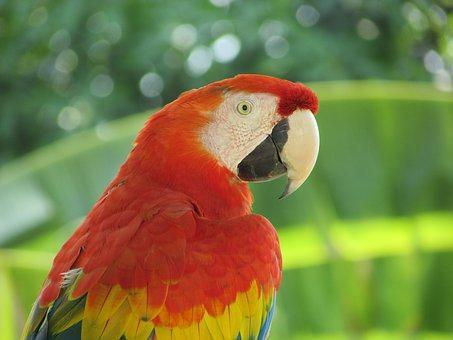

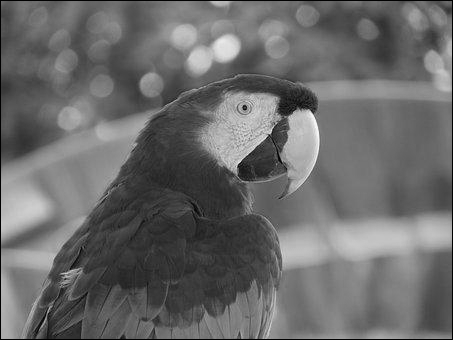

In [ ]:

import cv2
!wget -O parrot.jpg "https://drive.google.com/uc?export=view&id=1SbpTCtyfVURCJseCKhPnUEFcRg4P9JsX"
parrot = cv2.imread("parrot.jpg")
print(parrot.shape)
(h, w, c) = parrot.shape

res = np.zeros((h, w))
for i in range(1, h - 1):
  for j in range(1, w - 1):
    res[i][j] = 0.2989 * parrot[i][j][0] + 0.5870 *  parrot[i][j][1] + 0.1140 *  parrot[i][j][2]
from google.colab.patches import cv2_imshow

cv2_imshow(parrot)
cv2_imshow(res)
cv2.waitKey(0)
cv2.destroyAllWindows()